In [1]:
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 
import warnings 
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv(r'Amazon Sale Report.csv')
df.head()

,index,Order ID,Date,Status,Fulfilment,Sales Channel,ship-service-level,Style,SKU,Category,...,currency,Amount,ship-city,ship-state,ship-postal-code,ship-country,promotion-ids,B2B,fulfilled-by,Unnamed: 22
0,0,405-8078784-5731545,04-30-22,Cancelled,Merchant,Amazon.in,Standard,SET389,SET389-KR-NP-S,Set,...,INR,647.62,MUMBAI,MAHARASHTRA,400081.0,IN,NaN,False,Easy Ship,NaN
1,1,171-9198151-1101146,04-30-22,Shipped - Delivered to Buyer,Merchant,Amazon.in,Standard,JNE3781,JNE3781-KR-XXXL,kurta,...,INR,406.00,BENGALURU,KARNATAKA,560085.0,IN,Amazon PLCC Free-Financing Universal Merchant ...,False,Easy Ship,NaN
2,2,404-0687676-7273146,04-30-22,Shipped,Amazon,Amazon.in,Expedited,JNE3371,JNE3371-KR-XL,kurta,...,INR,329.00,NAVI MUMBAI,MAHARASHTRA,410210.0,IN,IN Core Free Shipping 2015/04/08 23-48-5-108,True,NaN,NaN
3,3,403-9615377-8133951,04-30-22,Cancelled,Merchant,Amazon.in,Standard,J0341,J0341-DR-L,Western Dress,...,INR,753.33,PUDUCHERRY,PUDUCHERRY,605008.0,IN,NaN,False,Easy Ship,NaN
4,4,407-1069790-7240320,04-30-22,Shipped,Amazon,Amazon.in,Expedited,JNE3671,JNE3671-TU-XXXL,Top,...,INR,574.00,CHENNAI,TAMIL NADU,600073.0,IN,NaN,False,NaN,NaN


In [3]:
df.columns

Index(['index', 'Order ID', 'Date', 'Status', 'Fulfilment', 'Sales Channel ',
       'ship-service-level', 'Style', 'SKU', 'Category', 'Size', 'ASIN',
       'Courier Status', 'Qty', 'currency', 'Amount', 'ship-city',
       'ship-state', 'ship-postal-code', 'ship-country', 'promotion-ids',
       'B2B', 'fulfilled-by', 'Unnamed: 22'],
      dtype='object')

In [4]:
selected_columns = ["Date",	"Category",	"Size",	"Qty",	"Amount"] 
selected_columns 
df2 = df[selected_columns]
df2.head()

,Date,Category,Size,Qty,Amount
0,04-30-22,Set,S,0,647.62
1,04-30-22,kurta,3XL,1,406.00
2,04-30-22,kurta,XL,1,329.00
3,04-30-22,Western Dress,L,0,753.33
4,04-30-22,Top,3XL,1,574.00


In [5]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 128975 entries, 0 to 128974
Data columns (total 5 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   Date      128975 non-null  object 
 1   Category  128975 non-null  object 
 2   Size      128975 non-null  object 
 3   Qty       128975 non-null  int64  
 4   Amount    121180 non-null  float64
dtypes: float64(1), int64(1), object(3)
memory usage: 4.9+ MB


In [6]:
df2.Category.value_counts() 

Category
Set              50284
kurta            49877
Western Dress    15500
Top              10622
Ethnic Dress      1159
Blouse             926
Bottom             440
Saree              164
Dupatta              3
Name: count, dtype: int64

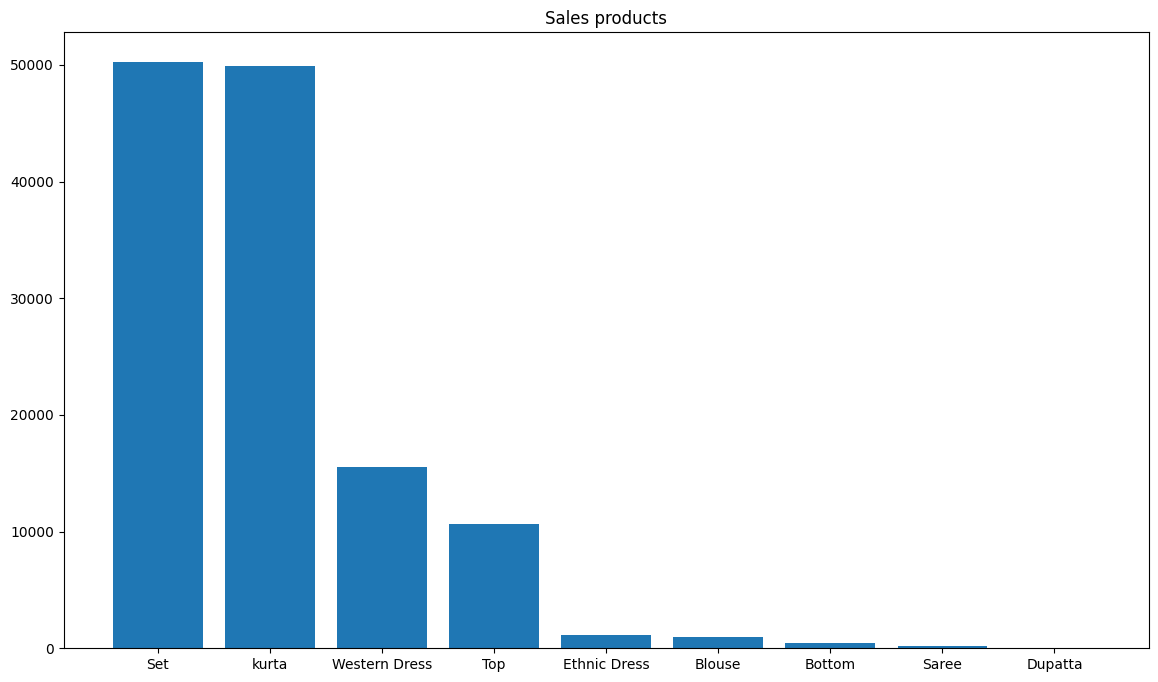

In [7]:
plt.figure(figsize=(14,8))
plt.bar(df2.Category.value_counts().keys(),df2.Category.value_counts().values )
plt.title("Sales products")
plt.show()


In [8]:
round(df2.isnull().sum()/df2.shape[0] * 100 ,2)  # missing values percetage wise

Date        0.00
Category    0.00
Size        0.00
Qty         0.00
Amount      6.04
dtype: float64

In [9]:
df2_groupby = df2.groupby('Category')
AVERAGE_AMOUNT_EACH_CLASS = (df2_groupby['Amount'].mean()).to_dict()
AVERAGE_AMOUNT_EACH_CLASS

{'Blouse': 520.3271055618615,
 'Bottom': 358.7332857142857,
 'Dupatta': 305.0,
 'Ethnic Dress': 723.8953888380604,
 'Saree': 799.5726451612903,
 'Set': 833.3855709791251,
 'Top': 526.0986030496803,
 'Western Dress': 762.7905801142546,
 'kurta': 455.92710790504526}

In [10]:
# Missing value imputation class wise 
for category , average_amount in AVERAGE_AMOUNT_EACH_CLASS.items():
    df3 = df2[df2['Category'] == category]
    # print(category,"    ",average_amount)
    df3['Amount'] = df3['Amount'].fillna(average_amount)

In [11]:
round(df3.isnull().sum()/df3.shape[0] * 100 ,2)  # missing values percetage wise


Date        0.0
Category    0.0
Size        0.0
Qty         0.0
Amount      0.0
dtype: float64

In [12]:
kurta = df3[df3['Category']=='kurta']
kurta.head()

,Date,Category,Size,Qty,Amount
1,04-30-22,kurta,3XL,1,406.0
2,04-30-22,kurta,XL,1,329.0
7,04-30-22,kurta,S,1,399.0
9,04-30-22,kurta,XXL,1,363.0
10,04-30-22,kurta,S,1,685.0


In [13]:
kurta['Date']= pd.to_datetime(kurta['Date'])

In [14]:
# data day, month , year wise 
kurta['Day'] = kurta['Date'].dt.day 
kurta['Month'] = kurta['Date'].dt.month 
kurta['Year'] = kurta['Date'].dt.year 


In [15]:
kurta.head()

,Date,Category,Size,Qty,Amount,Day,Month,Year
1,2022-04-30,kurta,3XL,1,406.0,30,4,2022
2,2022-04-30,kurta,XL,1,329.0,30,4,2022
7,2022-04-30,kurta,S,1,399.0,30,4,2022
9,2022-04-30,kurta,XXL,1,363.0,30,4,2022
10,2022-04-30,kurta,S,1,685.0,30,4,2022


In [16]:
print("Product Data from : ",kurta['Date'].min())
print("Till here : ",kurta['Date'].min())

Product Data from :  2022-03-31 00:00:00
Till here :  2022-03-31 00:00:00


In [17]:
month_dt = {'march':3,'april':4,'may':5,'jun':6}

april_month_sales = kurta[kurta['Month'] == month_dt['april']]
april_month_sales.head()

,Date,Category,Size,Qty,Amount,Day,Month,Year
1,2022-04-30,kurta,3XL,1,406.0,30,4,2022
2,2022-04-30,kurta,XL,1,329.0,30,4,2022
7,2022-04-30,kurta,S,1,399.0,30,4,2022
9,2022-04-30,kurta,XXL,1,363.0,30,4,2022
10,2022-04-30,kurta,S,1,685.0,30,4,2022


In [18]:
april_month_sales['Day'].unique()   # daily bases records are present 

array([30, 29, 28, 27, 26, 25, 24, 23, 22, 21, 20, 19, 18, 17, 16, 15, 14,
       13, 12, 11, 10,  9,  8,  7,  6,  5,  4,  3,  2,  1], dtype=int32)

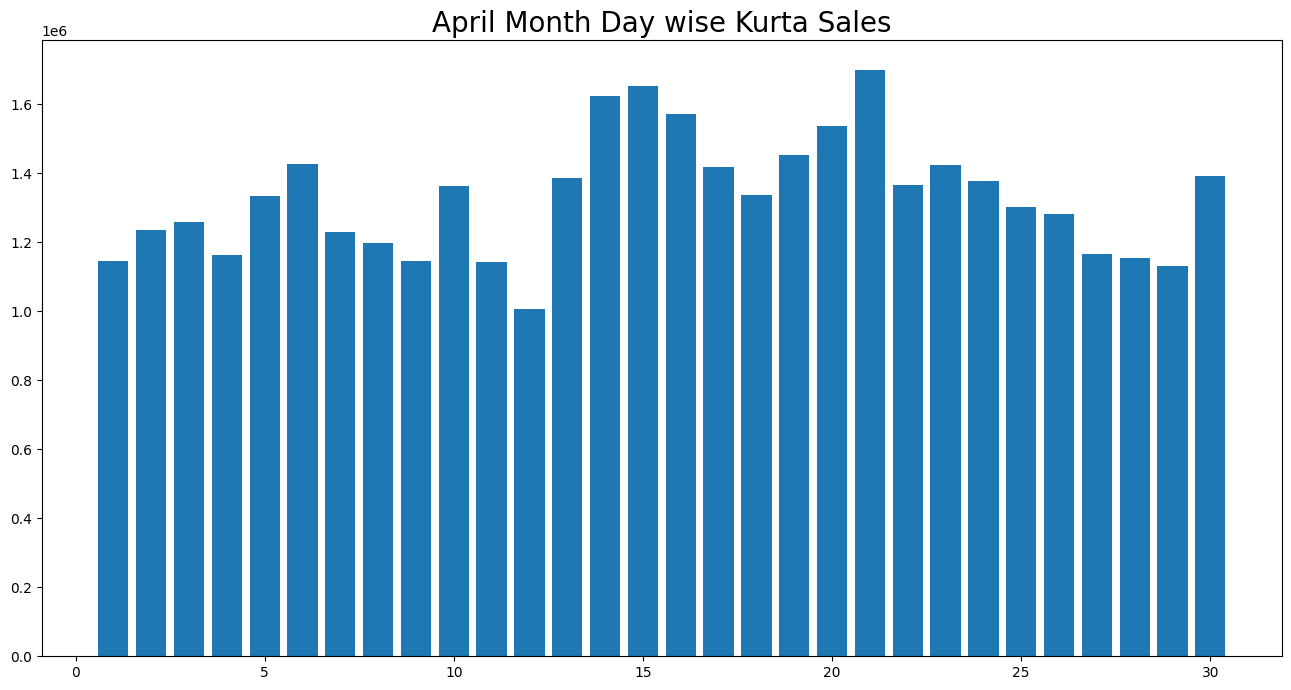

In [19]:
## Daywise sales in april month 
day_wise_group = april_month_sales.groupby('Day')

plt.figure(figsize=(16,8))
plt.bar(day_wise_group['Year'].mean().keys(),day_wise_group['Year'].sum().values)
plt.title("April Month Day wise Kurta Sales",fontdict={'fontsize':20})
plt.show()

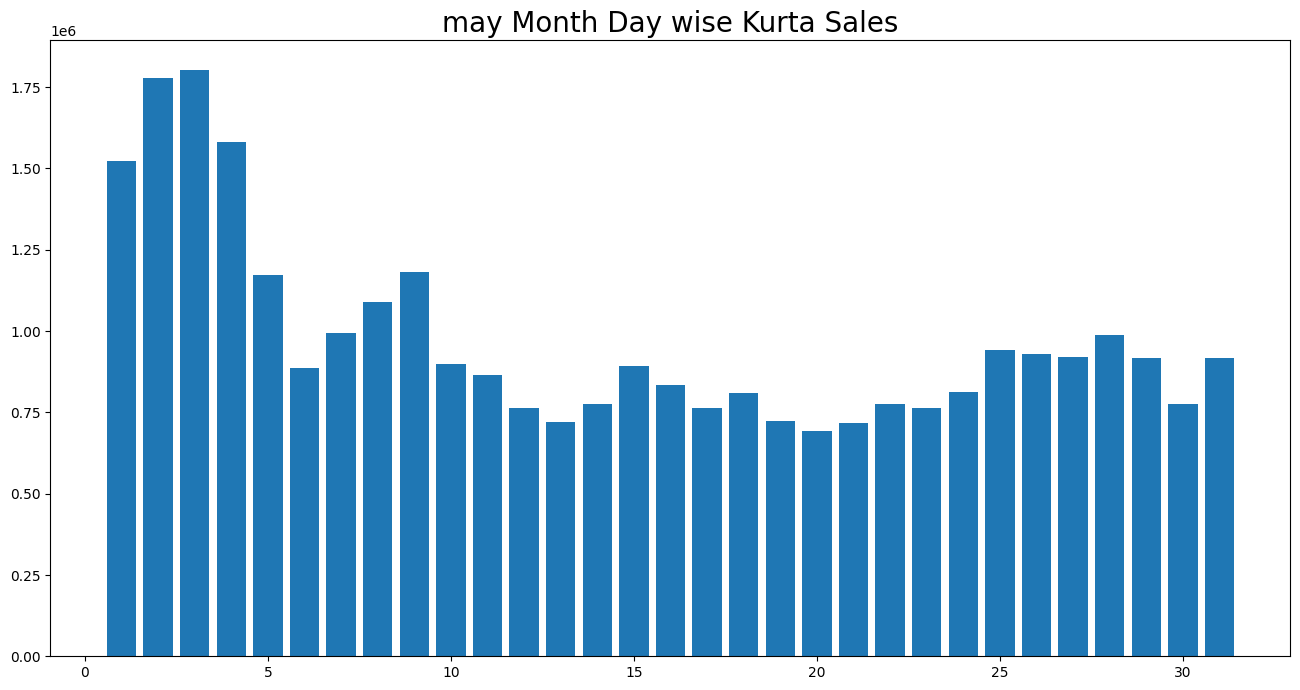

In [20]:
may_month_sales = kurta[kurta['Month'] == month_dt['may']]

## Daywise sales  
day_wise_group = may_month_sales.groupby('Day')

plt.figure(figsize=(16,8))
plt.bar(day_wise_group['Year'].mean().keys(),day_wise_group['Year'].sum().values)
plt.title("may Month Day wise Kurta Sales",fontdict={'fontsize':20})
plt.show()

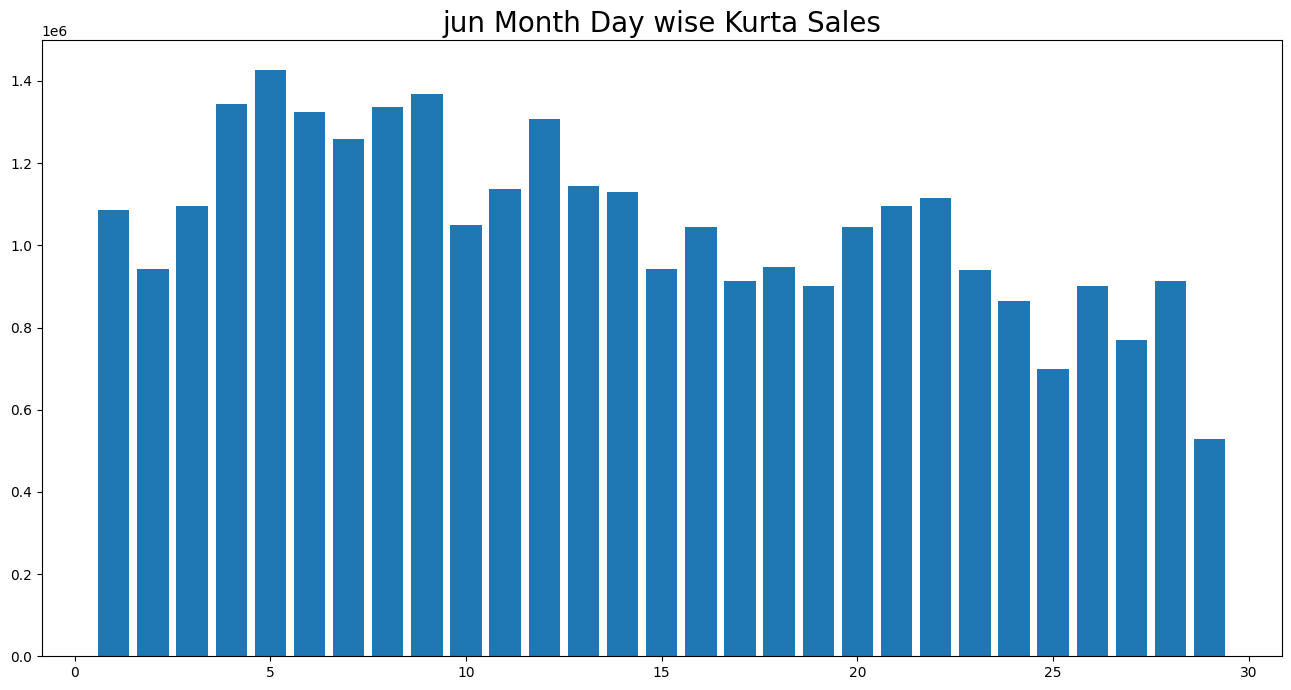

In [21]:
jun_month_sales = kurta[kurta['Month'] == month_dt['jun']]

## Daywise sales  
day_wise_group = jun_month_sales.groupby('Day')

plt.figure(figsize=(16,8))
plt.bar(day_wise_group['Year'].mean().keys(),day_wise_group['Year'].sum().values)
plt.title("jun Month Day wise Kurta Sales",fontdict={'fontsize':20})
plt.show()

In [22]:
## grouping the date wise 
group1 = kurta[kurta['Month'] == month_dt['april']].groupby('Date')
group2 = kurta[kurta['Month'] == month_dt['may']].groupby('Date')
group3 = kurta[kurta['Month'] == month_dt['jun']].groupby('Date')


In [23]:
# creating a one dataset, average Amount datewise 
dataset = pd.concat([group1[['Amount']].mean(),group2[['Amount']].mean(),group3[['Amount']].mean()])
dataset.to_csv("forcasting_data.csv")

In [24]:
dataset.head()

,Amount
Date,
2022-04-01,444.264419
2022-04-02,439.547248
2022-04-03,442.342287
2022-04-04,443.296713
2022-04-05,439.486710


In [25]:
dataset.describe()

,Amount
count,90.000000
mean,459.982410
std,22.647777
min,422.677638
25%,439.411675
50%,462.217935
75%,474.344697
max,505.430567


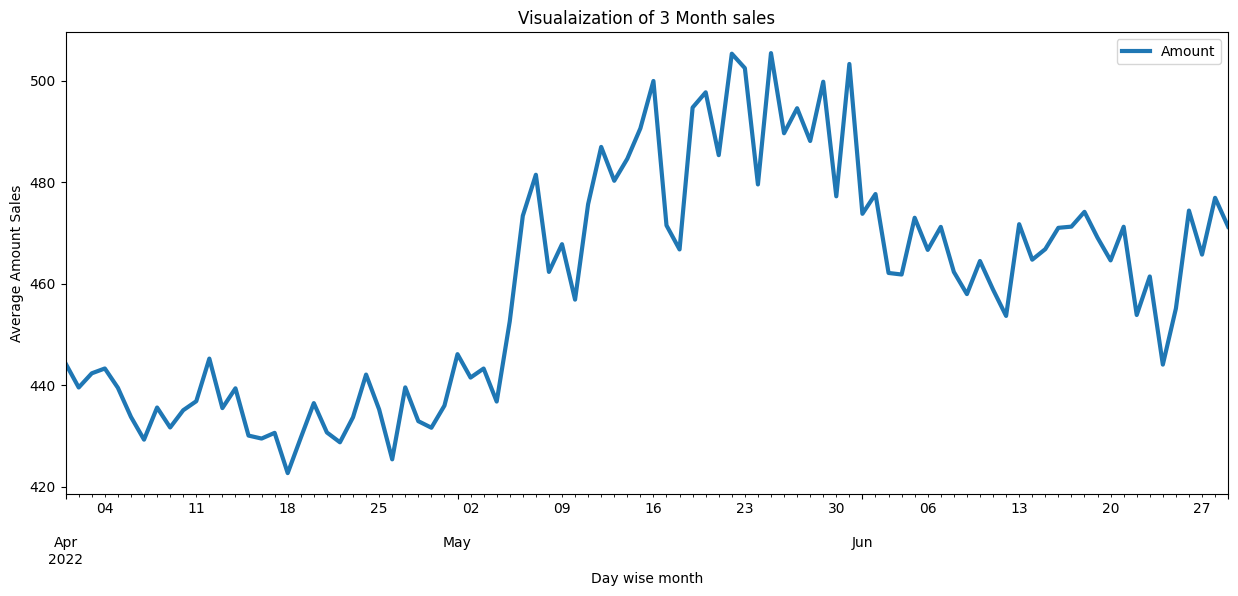

In [26]:
dataset.plot(figsize=(15,6),lw=3)
plt.axvline(x = 7, color = 'b', label = 'axvline - full height')
plt.title("Visualaization of 3 Month sales")
plt.ylabel("Average Amount Sales")
plt.xlabel("Day wise month")
plt.show()

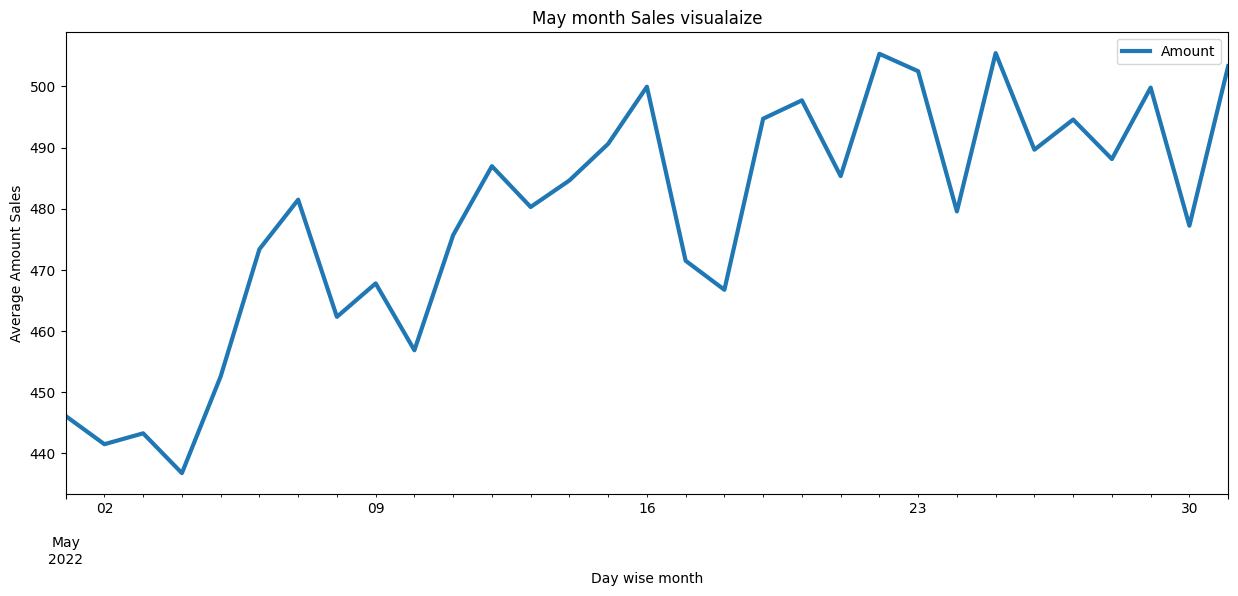

In [27]:
dataset.loc['2022-05-01':'2022-05-31'].plot(figsize=(15,6),lw=3)
plt.title("May month Sales visualaize")
plt.ylabel("Average Amount Sales")
plt.xlabel("Day wise month")
plt.show()

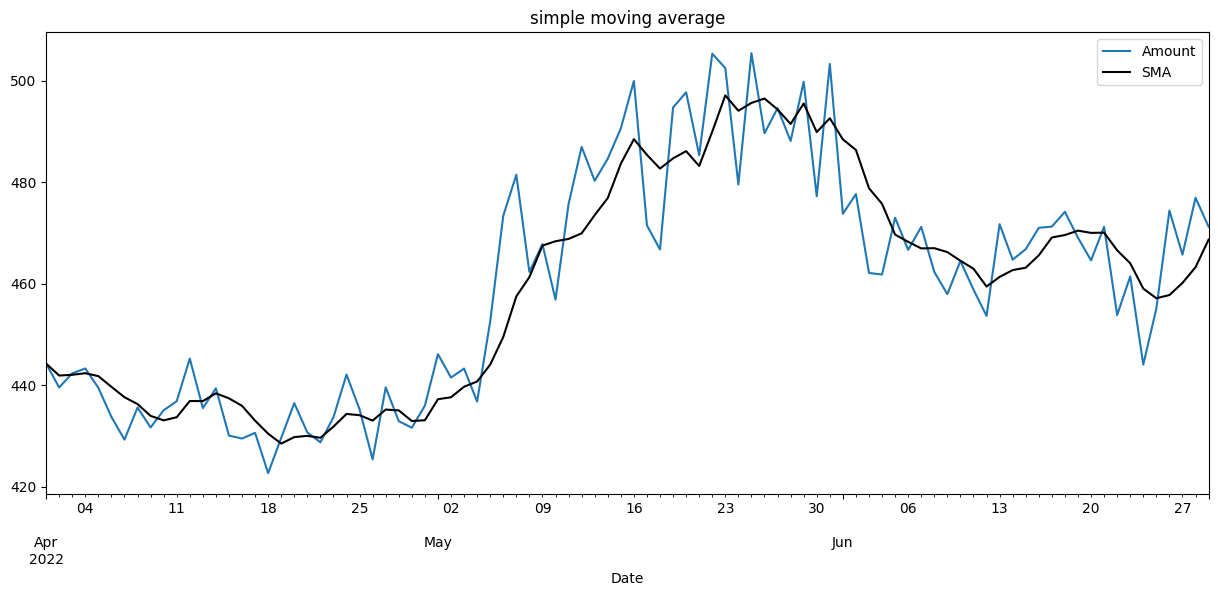

In [28]:
fig, ax = plt.subplots(figsize=(15, 6))  # Create a figure and axes

# Plot the original dataset on the same axes
dataset.plot(ax=ax, label='Original Data')

# Plot the expanding mean on the same axes
dataset['Amount'].rolling(window=5,min_periods=1).mean().plot(figsize=(15,6),color='k',label='SMA')
plt.title("simple moving average")
ax.legend()
plt.show()

### Cumulative sum of the Amount 

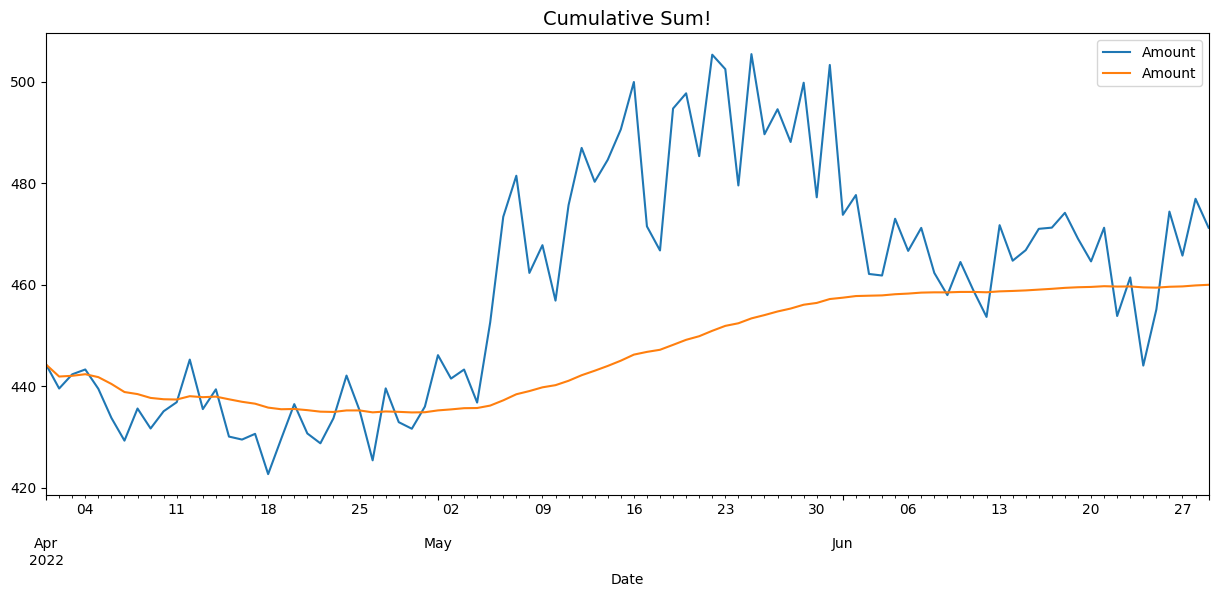

In [29]:
fig, ax = plt.subplots(figsize=(15, 6))  # Create a figure and axes

# Plot the original dataset on the same axes
dataset.plot(ax=ax, label='Original Data')

# Plot the expanding mean on the same axes
dataset.expanding().mean().plot(ax=ax, label='Expanding Mean')
plt.title("Cumulative Sum!",fontdict={'fontsize':14})
ax.legend()
plt.show()


In [30]:
### Testing For Stationarity
from statsmodels.tsa.stattools import adfuller

Stationary data refers to a time series whose statistical properties, such as mean, variance, and autocorrelation, do not change over time. In other words, stationary data maintains a consistent pattern, making it easier to analyze and model.<br><br>
<img src="stationary_image.png" height=300px width=800px>

In [31]:
#Ho: It is non stationary
#H1: It is stationary

def adfuller_test(average_sales_daywise):
    result=adfuller(average_sales_daywise)
    labels = ['ADF Test Statistic','p-value','#Lags Used','Number of Observations Used']
    for value,label in zip(result,labels):
        print(label+' : '+str(value) )
    if result[1] <= 0.05:
        print("strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data has no unit root and is stationary (Stationary Data)")
    else:
        print("weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary (Non-Stationary Data)")
    
adfuller_test(dataset['Amount'])

ADF Test Statistic : -1.3697184124319586
p-value : 0.5967043483289428
#Lags Used : 2
Number of Observations Used : 87
weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary (Non-Stationary Data)


### Apply Differencing 

In [32]:
dataset['stationary_amount'] = dataset['Amount']-dataset['Amount'].shift(6)
# no. of shifting choose cycle period wise,
# if cycyle period is quartely then choose == 3 
# if cycle period is yearly then choose == 12 
# i choosed 6 because it is half yearly  

In [33]:
# removing NAN value that comes due to the shifting operation 
dataset.dropna(inplace=True)

#### Lets again check the seasonality, after applied defferencing

In [34]:
#Ho: It is non stationary
#H1: It is stationary

def adfuller_test(average_sales_daywise):
    result=adfuller(average_sales_daywise)
    labels = ['ADF Test Statistic','p-value','#Lags Used','Number of Observations Used']
    for value,label in zip(result,labels):
        print(label+' : '+str(value) )
    if result[1] <= 0.05:
        print("strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data has no unit root and is stationary (Stationary Data)")
    else:
        print("weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary (Non-Stationary Data)")
    
adfuller_test(dataset['stationary_amount'])
print("successfully converted into stationary data, with the differencing techiques")


ADF Test Statistic : -3.6076159261571967
p-value : 0.0056170857501922295
#Lags Used : 1
Number of Observations Used : 82
strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data has no unit root and is stationary (Stationary Data)
successfully converted into stationary data, with the differencing techiques


In [40]:
dataset.head(10)

,Amount,stationary_amount
Date,,
2022-04-07,429.273743,-14.990676
2022-04-08,435.603105,-3.944143
2022-04-09,431.670139,-10.672148
2022-04-10,435.066295,-8.230418
2022-04-11,436.846959,-2.639751
2022-04-12,445.244069,11.490606
2022-04-13,435.488196,6.214452
2022-04-14,439.386664,3.783558
2022-04-15,430.074696,-1.595443


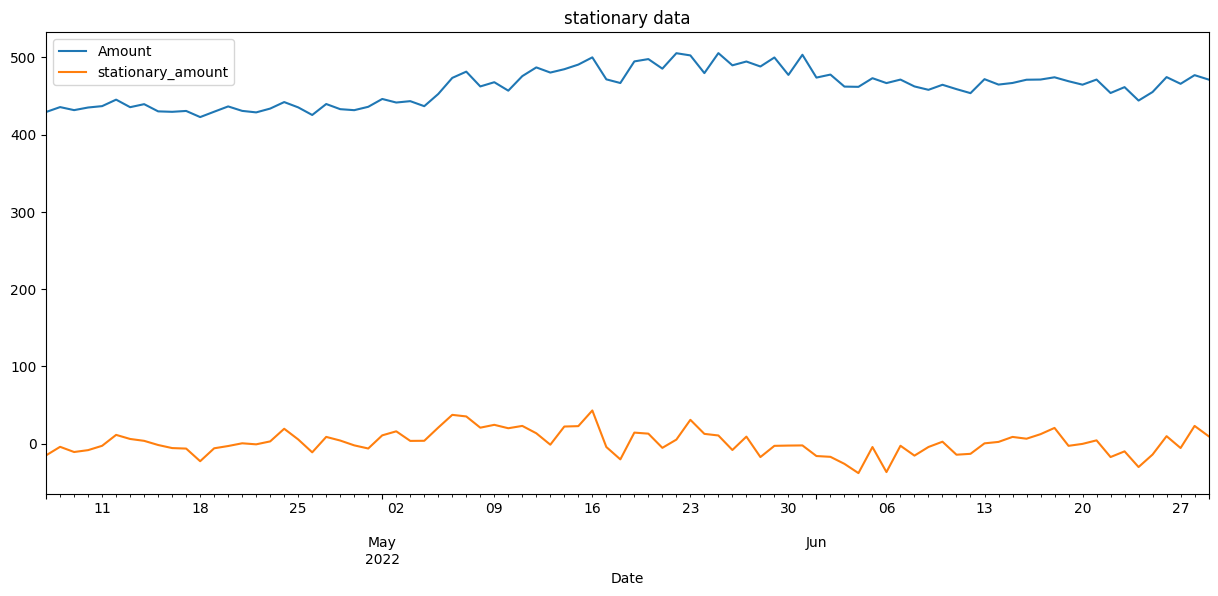

In [39]:
dataset[['Amount','stationary_amount']].plot(figsize=(15,6))
plt.title("stationary data")
plt.show()

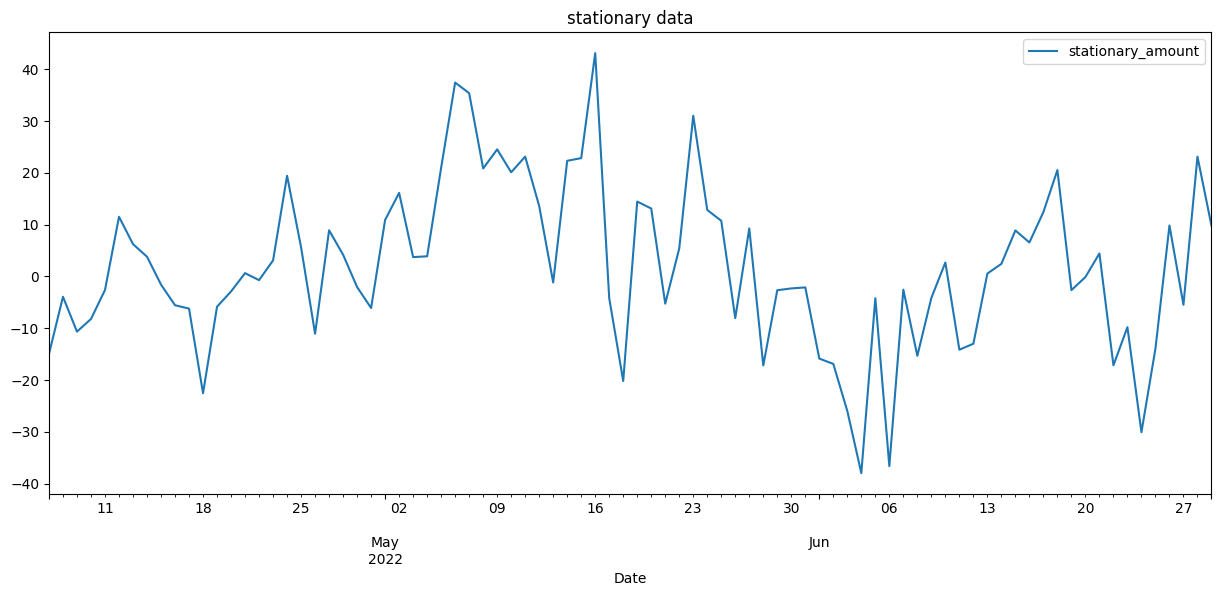

In [41]:
dataset[['stationary_amount']].plot(figsize=(15,6))
plt.title("stationary data")
plt.show()

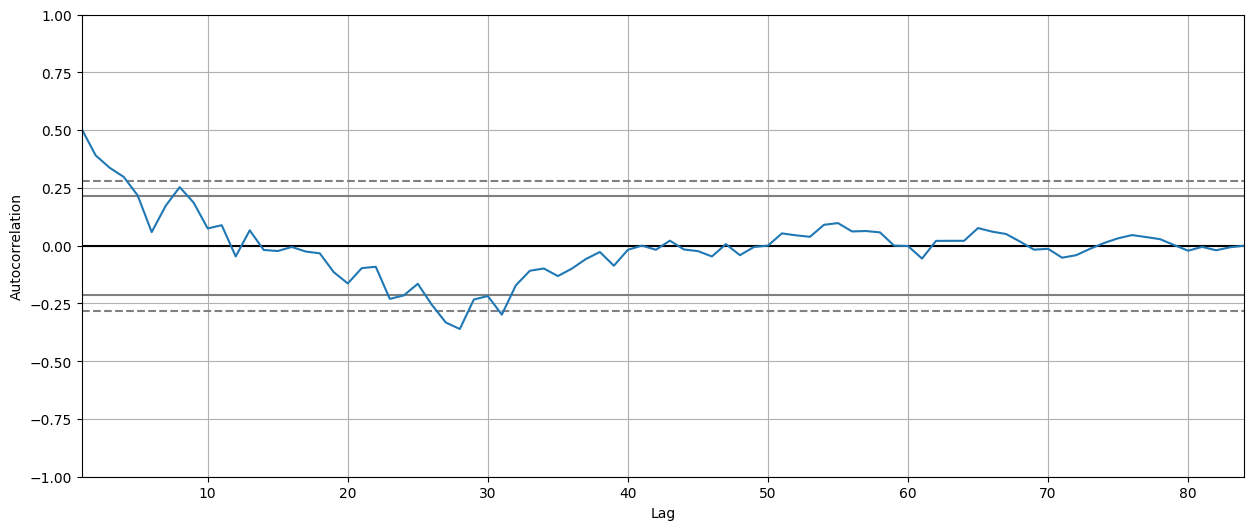

In [ ]:
#acf plot
from pandas.plotting import autocorrelation_plot
import matplotlib.pyplot as plt

# Create a figure with the specified size
plt.figure(figsize=(15, 6))

# Plot the autocorrelation
autocorrelation_plot(dataset['stationary_amount'])

# Display the plot
plt.show()


In [48]:
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf
import statsmodels as sm 

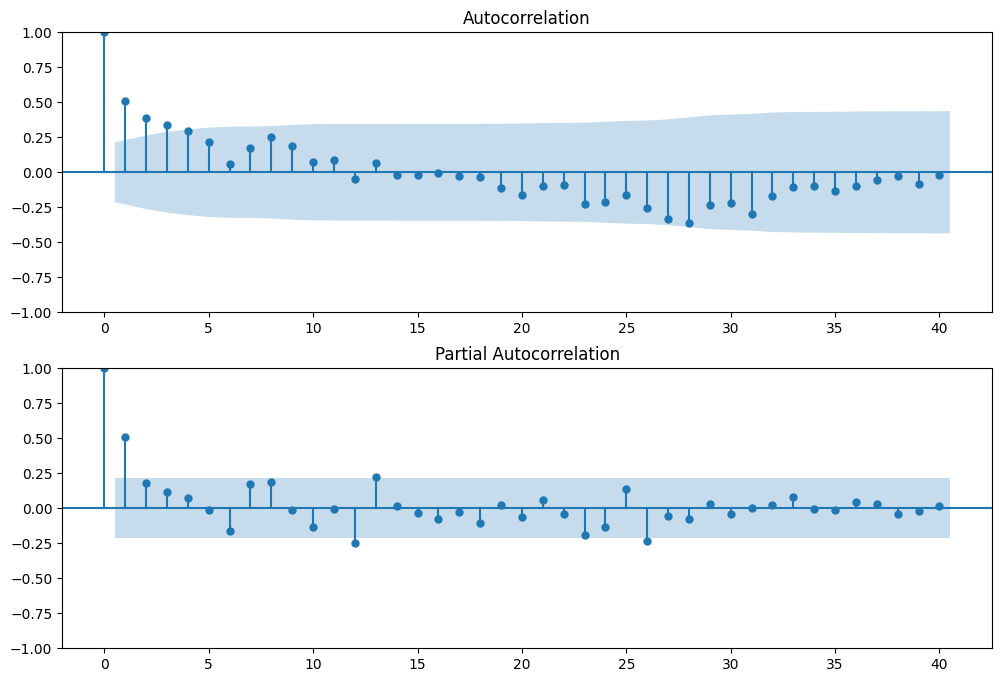

In [52]:
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# Create a figure with a specified size
fig = plt.figure(figsize=(12, 8))

# Add the first subplot for the ACF plot
ax1 = fig.add_subplot(211)
plot_acf(dataset['stationary_amount'], lags=40, ax=ax1)

# Add the second subplot for the PACF plot
ax2 = fig.add_subplot(212)
plot_pacf(dataset['stationary_amount'], lags=40, ax=ax2)

# Display the plots
plt.show()


In [55]:
from statsmodels.tsa.arima.model import ARIMA

# Define the ARIMA model
model = ARIMA(dataset['stationary_amount'], order=(1, 1, 1))

# Fit the model
model_fit = model.fit()

# Print a summary of the fitted model
print(model_fit.summary())


c:\Users\Ranjit\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
c:\Users\Ranjit\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
c:\Users\Ranjit\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


                               SARIMAX Results                                
Dep. Variable:      stationary_amount   No. Observations:                   84
Model:                 ARIMA(1, 1, 1)   Log Likelihood                -333.860
Date:                Fri, 13 Dec 2024   AIC                            673.720
Time:                        20:28:18   BIC                            680.976
Sample:                    04-07-2022   HQIC                           676.635
                         - 06-29-2022                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.2259      0.152      1.485      0.138      -0.072       0.524
ma.L1         -0.7707      0.106     -7.282      0.000      -0.978      -0.563
sigma2       181.2834     29.859      6.071      0.0

In [58]:
dataset.shape 

(84, 2)

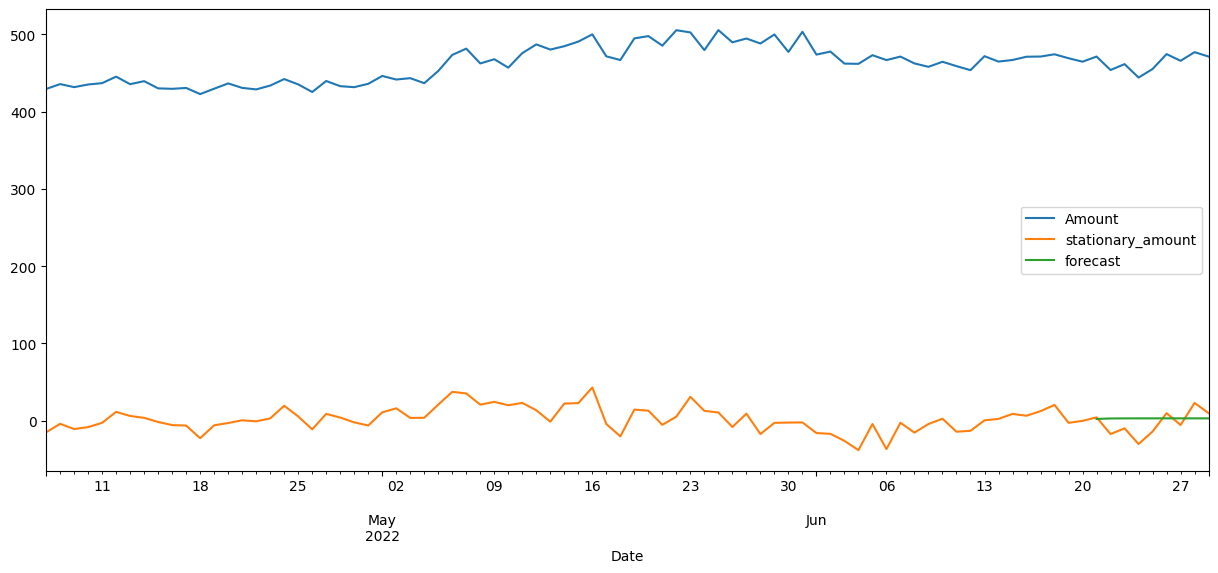

In [62]:
dataset['forecast']=model_fit.predict(start=75,end=120,dynamic=True)
dataset[['Amount','stationary_amount','forecast']].plot(figsize=(15,6))
plt.show()

In [65]:
import statsmodels.api as sm
model=sm.tsa.statespace.SARIMAX(dataset['Amount'],order=(1, 1, 1),seasonal_order=(1,1,1,12))
results=model.fit()
print(results.summary())

c:\Users\Ranjit\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
c:\Users\Ranjit\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


                                     SARIMAX Results                                      
Dep. Variable:                             Amount   No. Observations:                   84
Model:             SARIMAX(1, 1, 1)x(1, 1, 1, 12)   Log Likelihood                -282.757
Date:                            Fri, 13 Dec 2024   AIC                            575.515
Time:                                    20:34:48   BIC                            586.828
Sample:                                04-07-2022   HQIC                           580.014
                                     - 06-29-2022                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.0563      0.192     -0.294      0.769      -0.432       0.319
ma.L1         -0.4566      0.181   

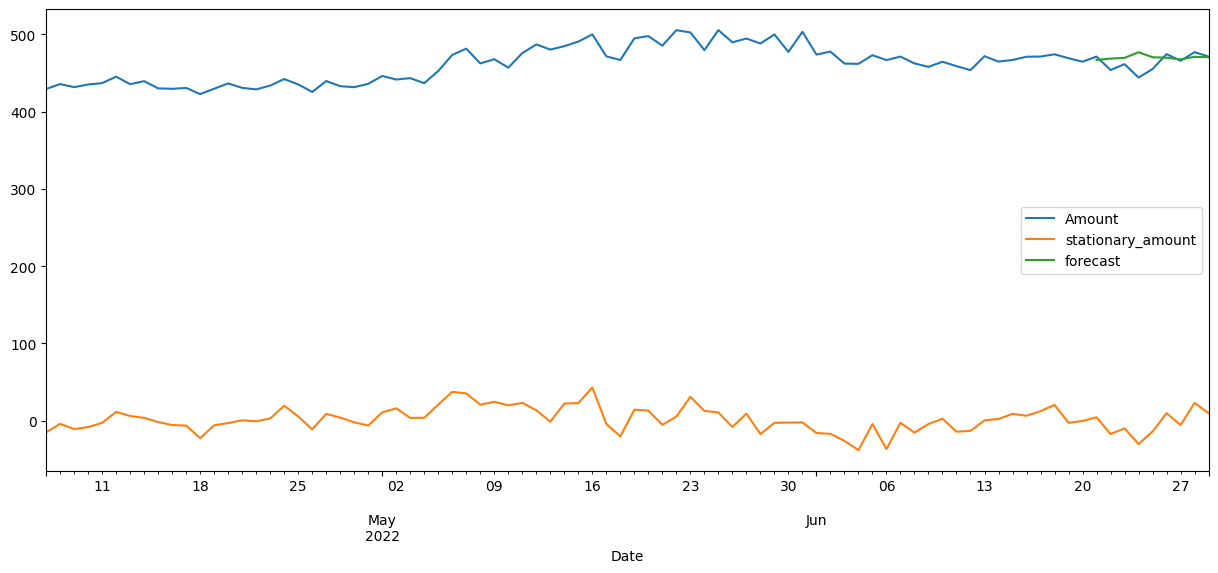

In [82]:
dataset['forecast']=results.predict(start=75,end=130,dynamic=True)
dataset[['Amount','stationary_amount','forecast']].plot(figsize=(15,6))
plt.show()

In [83]:
dataset.iloc[75:].shape 

(9, 3)

In [84]:
# these are present time sireis prediction 
dataset[dataset["forecast"].isnull()==False][["Amount","forecast"]]

,Amount,forecast
Date,,
2022-06-21,471.223787,466.898995
2022-06-22,453.830681,468.603824
2022-06-23,461.428621,469.573149
2022-06-24,444.059968,476.786941
2022-06-25,455.117388,470.332795
2022-06-26,474.406233,469.728831
2022-06-27,465.732203,467.640703
2022-06-28,476.924230,470.901885
2022-06-29,471.223559,470.302024


In [108]:
# future date forecasting  
from pandas.tseries.offsets import DateOffset
future_dates=[dataset.index[-1]+ DateOffset(days=x)for x in range(0,30)]

In [109]:
future_dates

[Timestamp('2022-06-29 00:00:00'),
 Timestamp('2022-06-30 00:00:00'),
 Timestamp('2022-07-01 00:00:00'),
 Timestamp('2022-07-02 00:00:00'),
 Timestamp('2022-07-03 00:00:00'),
 Timestamp('2022-07-04 00:00:00'),
 Timestamp('2022-07-05 00:00:00'),
 Timestamp('2022-07-06 00:00:00'),
 Timestamp('2022-07-07 00:00:00'),
 Timestamp('2022-07-08 00:00:00'),
 Timestamp('2022-07-09 00:00:00'),
 Timestamp('2022-07-10 00:00:00'),
 Timestamp('2022-07-11 00:00:00'),
 Timestamp('2022-07-12 00:00:00'),
 Timestamp('2022-07-13 00:00:00'),
 Timestamp('2022-07-14 00:00:00'),
 Timestamp('2022-07-15 00:00:00'),
 Timestamp('2022-07-16 00:00:00'),
 Timestamp('2022-07-17 00:00:00'),
 Timestamp('2022-07-18 00:00:00'),
 Timestamp('2022-07-19 00:00:00'),
 Timestamp('2022-07-20 00:00:00'),
 Timestamp('2022-07-21 00:00:00'),
 Timestamp('2022-07-22 00:00:00'),
 Timestamp('2022-07-23 00:00:00'),
 Timestamp('2022-07-24 00:00:00'),
 Timestamp('2022-07-25 00:00:00'),
 Timestamp('2022-07-26 00:00:00'),
 Timestamp('2022-07-

In [110]:
# future_datest_df=pd.DataFrame(index=future_dates[1:],columns=dataset.columns)
future_dates = pd.DataFrame(index=future_dates[1:],columns=dataset.columns)
future_dates

,Amount,stationary_amount,forecast
2022-06-30,NaN,NaN,NaN
2022-07-01,NaN,NaN,NaN
2022-07-02,NaN,NaN,NaN
2022-07-03,NaN,NaN,NaN
2022-07-04,NaN,NaN,NaN
2022-07-05,NaN,NaN,NaN
2022-07-06,NaN,NaN,NaN
2022-07-07,NaN,NaN,NaN
2022-07-08,NaN,NaN,NaN
2022-07-09,NaN,NaN,NaN


In [111]:
future_df=pd.concat([dataset,future_dates])

In [112]:
future_df.tail()

,Amount,stationary_amount,forecast
2022-07-24,NaN,NaN,NaN
2022-07-25,NaN,NaN,NaN
2022-07-26,NaN,NaN,NaN
2022-07-27,NaN,NaN,NaN
2022-07-28,NaN,NaN,NaN


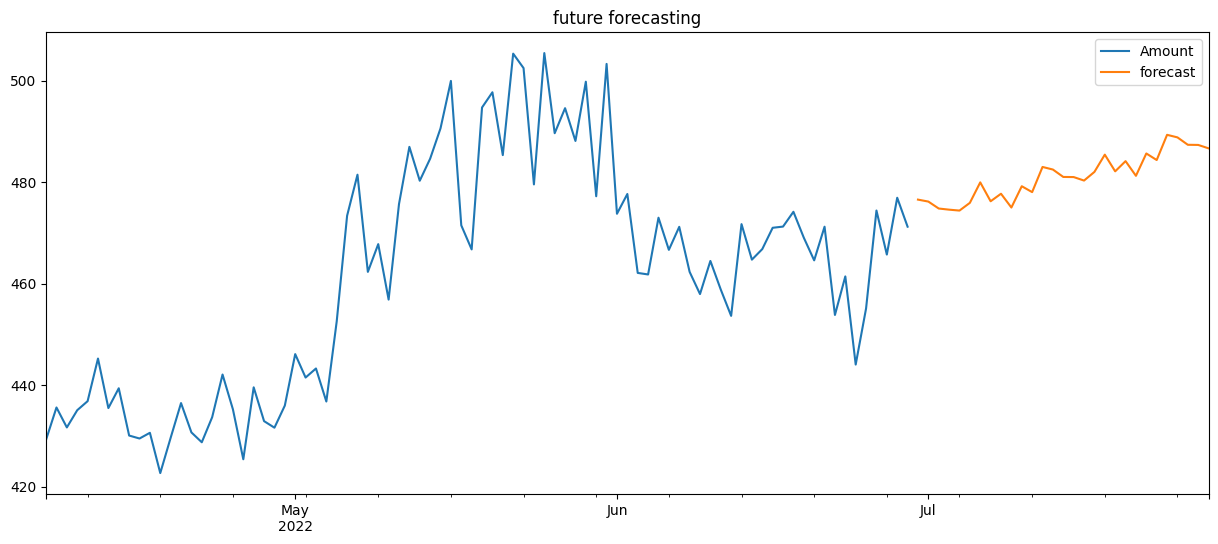

In [113]:
future_df['forecast'] = results.predict(start = 84, end = 120, dynamic= True)  
future_df[['Amount', 'forecast']].plot(figsize=(15, 6)) 
plt.title("future forecasting")
plt.show()


In [115]:
future_demand_forecasted_day_wise = future_df[future_df['forecast'].isnull()==False][["forecast"]]
future_demand_forecasted_day_wise

,forecast
2022-06-30,476.558266
2022-07-01,476.171563
2022-07-02,474.803786
2022-07-03,474.578287
2022-07-04,474.399017
2022-07-05,475.922783
2022-07-06,479.956587
2022-07-07,476.232270
2022-07-08,477.716285
2022-07-09,474.997563


In [116]:
future_demand_forecasted_day_wise.to_csv("forcasted next 30 day.csv")
print("Your forecasting is saved!")

Your forecasting is saved!
